In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import expon
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [64]:
def generate_brownian_motion(n_steps, delta=1):
    x = np.zeros(n_steps)
    x[1:] = np.cumsum(np.random.normal(0, delta, n_steps - 1))
    return x

def simulate_vasicek_euler(r0, kappa, theta, sigma, T, dt, seed=None):
    np.random.seed(seed)
    N = int(T / dt)
    rates = np.zeros(N)
    rates[0] = r0
    
    for t in range(1, N):
        dr = kappa * (theta - rates[t-1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
        rates[t] = rates[t-1] + dr
        
    return rates


def construct_visibility_graph(time_series):
    G = nx.Graph()
    n = len(time_series)
    
    for i in range(n):
        G.add_node(i)
        for j in range(i + 1, n):
            visible = True
            for k in range(i + 1, j):
                if time_series[k] >= time_series[i] + (time_series[j] - time_series[i]) * (k - i) / (j - i):
                    visible = False
                    break
            if visible:
                G.add_edge(i, j)
    return G

def extract_graph_features(G, n):
    degree_sequence = [d for _, d in G.degree()]
    avg_degree = degree_sequence[-1]
    clustering_coefficient = nx.clustering(G, n)
    avg_path_length = np.mean(list(nx.shortest_path_length(G, source=n).values()))
    curr_value = segment[-1]
    return avg_degree, clustering_coefficient, avg_path_length#, curr_value

def predict_with_machine_learning(features, next_value):
    X = np.array(features[:-1])  # All but the last point's features
    y = np.array(next_value[:-1])  # All but the last point's values
    
    # Linear Regression
    lr = LinearRegression()
    lr.fit(X, y)
    lr_fitted = lr.predict(features)
    lr_prediction = lr.predict([features[-1]])[0]
    
    # Neural Network
    nn = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
    nn.fit(X, y)
    nn_fitted = nn.predict(features)
    nn_prediction = nn.predict([features[-1]])[0]
    
    return lr_prediction, nn_prediction, lr_fitted, nn_fitted

# Step 5: Theoretical Best Prediction for Brownian Motion
def theoretical_best_prediction(time_series):
    # For Brownian motion, the best prediction for the next value is the current value
    return time_series[-2]


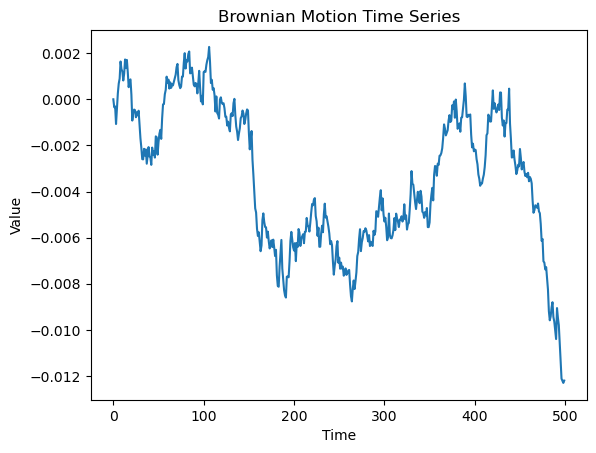

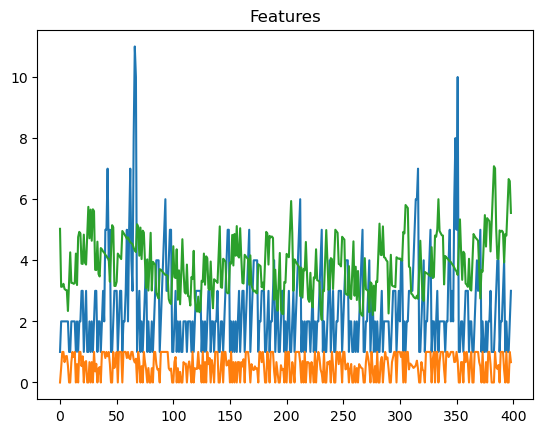

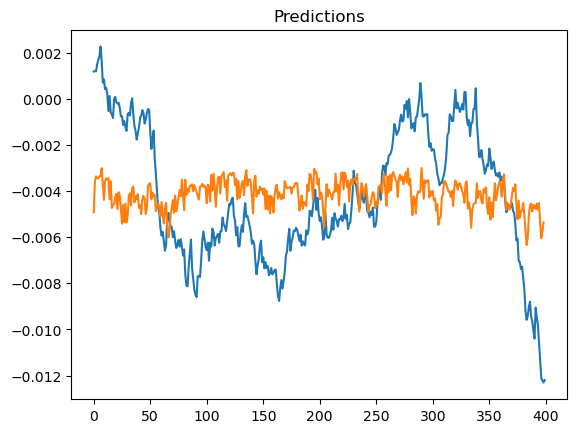

Linear Regression Error: 7.417259784455994e-06
Neural Network Error: 0.0013151758690202995
Theoretical Best Prediction Error: 6.936319409807172e-07


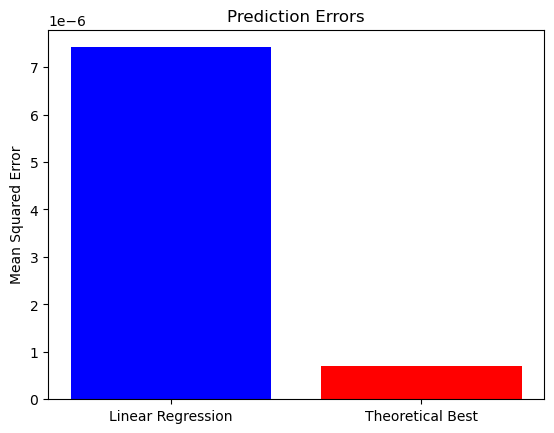

In [65]:

# Main Execution
n_steps = 500
#brownian_series = generate_brownian_motion(n_steps)
brownian_series = simulate_vasicek_euler(0, 0.05, 0, 0.01, 1, 1 / n_steps)

# Plot the generated Brownian motion time series
plt.plot(brownian_series)
plt.title("Brownian Motion Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# Prepare Data for Machine Learning
features = []
next_value = []

# Sliding window over the time series to generate features and labels
window_size = 100  # Use the last 50 points to generate the visibility graph
for i in range(window_size, len(brownian_series) - 1):
    segment = brownian_series[i-window_size:i]
    G = construct_visibility_graph(segment)
    graph_features = extract_graph_features(G, window_size-1)
    features.append(graph_features)
    next_value.append(brownian_series[i])

plt.plot(features)
plt.title("Features")
plt.show()

lr_preds = []
tr_preds = []
for i in range(window_size, len(brownian_series) - 1):
    lr_pred, nn_pred, lr_fitted, nn_fitted = predict_with_machine_learning(features[:i], next_value[:i])
    theoretical_pred = theoretical_best_prediction(brownian_series[:i])
    lr_preds.append(lr_pred)
    tr_preds.append(theoretical_pred)


actual_next_value = brownian_series[window_size+1:]

# Calculate Errors
lr_error = mean_squared_error(actual_next_value, lr_preds)
#nn_error = mean_squared_error(actual_next_value, lr_preds)
theoretical_error = mean_squared_error(actual_next_value, tr_preds)

plt.plot(brownian_series[window_size:])
plt.plot(lr_fitted)
#plt.plot(nn_fitted)
plt.title("Predictions")
plt.show()




print("Linear Regression Error:", lr_error)
print("Neural Network Error:", nn_error)
print("Theoretical Best Prediction Error:", theoretical_error)

# Plotting Predictions vs Actual
plt.bar(['Linear Regression', 'Theoretical Best'], 
        [lr_error, theoretical_error], color=['blue', 'red'])
plt.ylabel("Mean Squared Error")
plt.title("Prediction Errors")
plt.show()


In [9]:
features

[(7.72, 0.7535053113680115, 3.309387755102041),
 (7.6, 0.7472783164547867, 3.363265306122449),
 (8.08, 0.7303266570031275, 3.156734693877551),
 (8.48, 0.7494054148465915, 3.0906122448979594),
 (8.4, 0.7281190170338777, 3.0979591836734692),
 (8.92, 0.7227200645931297, 3.0546938775510206),
 (8.92, 0.7224477907713203, 3.049795918367347),
 (8.4, 0.7329083302318599, 3.0963265306122447),
 (8.0, 0.7337303742009624, 3.110204081632653),
 (7.76, 0.7062224376930258, 3.1542857142857144),
 (7.52, 0.7379452704158587, 3.195918367346939),
 (7.32, 0.7387547942253824, 3.2065306122448978),
 (7.2, 0.7415499990205874, 3.2122448979591836),
 (7.08, 0.6952469687175572, 3.24734693877551),
 (7.4, 0.7427152226858109, 3.0718367346938775),
 (7.72, 0.7438839689722044, 2.9959183673469387),
 (7.6, 0.7271971002853357, 2.969795918367347),
 (7.56, 0.7150542431424785, 2.975510204081633),
 (7.52, 0.7491018621900976, 2.9746938775510205),
 (7.52, 0.7531971002853356, 2.966530612244898),
 (7.6, 0.723318312406548, 2.9142857142

In [10]:
next_value

[-10.242979230339893,
 -8.512323780665582,
 -8.221052425987335,
 -8.806681012041167,
 -7.54530663761425,
 -8.504430332586823,
 -7.712779100112346,
 -7.9309298569844096,
 -8.657562901667857,
 -9.037489158028288,
 -9.199230502054984,
 -9.268212384043636,
 -9.661563370443691,
 -9.129372444383144,
 -9.025272751522667,
 -10.262669913148747,
 -12.547180941973561,
 -13.593738230614603,
 -14.023586211987471,
 -14.678841757389959,
 -14.647527583381788,
 -14.474820328463712,
 -14.968111261290447,
 -14.33354293354753,
 -14.892389260179845,
 -13.891172521459128,
 -14.700348606352277,
 -15.572346574981813,
 -16.102704968985154,
 -16.699015651413898,
 -15.320778893826567,
 -15.514544570830338,
 -16.129275357411633,
 -17.211287191336613,
 -18.18146888742258,
 -18.81084088911363,
 -18.751510494415456,
 -19.601566942994545,
 -18.78361039171454,
 -18.88681729909023,
 -19.47419974589975,
 -19.50330930959361,
 -19.580521603994438,
 -18.74159589492908,
 -18.45229195817337,
 -17.567433510403454,
 -18.523609

In [11]:
G.degree()

DegreeView({0: 2, 1: 2, 2: 5, 3: 2, 4: 5, 7: 10, 5: 3, 6: 3, 8: 11, 22: 14, 23: 6, 24: 15, 25: 10, 48: 14, 9: 10, 12: 12, 15: 9, 17: 11, 20: 6, 21: 8, 10: 4, 11: 3, 13: 6, 14: 5, 16: 2, 18: 6, 19: 5, 26: 2, 27: 7, 30: 10, 36: 13, 45: 10, 46: 9, 47: 13, 28: 3, 29: 3, 31: 8, 32: 4, 33: 5, 35: 5, 34: 3, 37: 2, 38: 9, 39: 8, 42: 10, 44: 4, 40: 5, 41: 3, 43: 4, 49: 1})